Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist

Importing MNIST Dataset and Reshape

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Seperating data for 20% validation, 80% training
num_validation_samples = int(0.2 * x_train.shape[0])
x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]
x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]

In [3]:
# Reshape MNIST data
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

Finding optimal n neighbor using knn classifier

In [4]:
n_neighbors = [1, 3, 5, 7, 9, 11, 13]
validation_accuracy = []
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_val, y_val)
    validation_accuracy.append(accuracy)

In [5]:
# Finding n neighbors value that have best performance
optimal_n = n_neighbors[np.argmax(validation_accuracy)]
print("Optimal n_neighbors:", optimal_n)

Optimal n_neighbors: 3


Retraining knn classifier with combined train and validation sets 

In [6]:
x_train_val = np.concatenate((x_train, x_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
knn = KNeighborsClassifier(n_neighbors=optimal_n)
knn.fit(x_train_val, y_train_val)

KNeighborsClassifier(n_neighbors=3)

Accuracy of test set:  0.9705


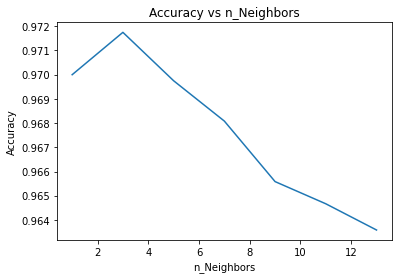

In [7]:
# Evaluating performance on test set
test_accuracy = knn.score(x_test, y_test)
print("Accuracy of test set: ", test_accuracy)

plt.plot(n_neighbors, validation_accuracy)
plt.title("Accuracy vs n_Neighbors")
plt.xlabel("n_Neighbors")
plt.ylabel("Accuracy")
plt.show()